# IS4303 IT-MEDIATED FINANCIAL SOLUTIONS AND PLATFORMS

> ## Week 4 Tutorial - Data Preprocessing and Regression

<div class="alert alert-danger">
<b>Python Version:</b> 2.7+<br>Create a virtual environment in Anaconda if needed.
</div>

## Sections:
* [0. Goal](#0)
* [1. Dataset](#1)
* [2. Data Preprocessing](#2)
* [3. Linear Regression](#3)
* [4. Logistic Regression](#4)

## Summary of Data Preprocessing

<div class="alert alert-success">
<b>Resources:</b> 
<a href="https://youtu.be/2e4fgSgn64Q" target="_blank" style="text-decoration: none"><span class="label label-info">DataPreprocessing</span></a>
<a href="https://youtu.be/Q4GNLhRtZNc" target="_blank" style="text-decoration: none"><span class="label label-warning">LinearRegression</span></a>
<a href="https://youtu.be/-la3q9d7AKQ" target="_blank" style="text-decoration: none"><span class="label label-danger">LogisticRegression</span></a>
</div>

In [1]:
# You can also watch this youtube video in this notebook
from IPython.display import HTML, IFrame
IFrame(src="https://www.youtube.com/embed/2e4fgSgn64Q", width="659", height="494")

***

<a id="0"></a>

## 0 Goal

#### The goal of this tutorial is to understand: 
* Data Preprocessing
* Linear Regression
* Logistic Regression 

<a id="1"></a>

## 1 Dataset

<br><div class="btn-group"> 
    <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Introduction</a>
    <a href="#overview" class="btn btn-success" role="button" style="text-decoration: none">Overview</a>
    <a href="#task" class="btn btn-warning" role="button" style="text-decoration: none">Tasks</a>
</div>

<a id="overview"></a>
#### Overview
The file <b><code>"default of credit card clients.xls"</code></b> contains information about customers' default payments. <br>

The dataset can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/). Information on the columns and features can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). <br>

**Output variable** is binary, default payment (Yes = 1, No = 0). We have the following 23 variables as **explanatory variables**: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

<a id="task"></a>
#### Tasks: Data Cleaning, Pre-processing and Simple Regression
* Understand the general procedure of data preprocessing
* Estimate and predict credit default behavior using regression methods

<a id="2"></a> 

## 2 Data Preprocessing

In [2]:
#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from functools import reduce
from collections import defaultdict
from IPython.display import HTML
%matplotlib inline

<div class="alert alert-warning">
<b>Step 2.1: Read data into python pandas and named as "default".</b><br><br>
    
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Read Excel</a>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Read CSV</a>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/io.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Read Others</a>
</div><br>

<div class="alert alert-danger">
<b>Note:</b> 
<ol>
    <li>The type of your file?</li>
    <li>Why do we set <code>header=1</code>?</li>
    <li>If you encounter error message, you may need to install or upgrade <code>xlrd</code> package in advance.</li>
</ol>
</div>    
</div>

In [3]:
%pwd
default = pd.read_excel("./default of credit card clients.xls", header=1)
default.drop(['ID', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], inplace=True, axis=1)

In [4]:
default.head(n=10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
print("The dimension of this data: ", default.shape)

The dimension of this data:  (30000, 18)


In [6]:
print("The variable names of this data: ", "\n", default.columns)

The variable names of this data:  
 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [7]:
# Are they all numerical variables?
print("Type of variables: ", "\n", default.dtypes)

Type of variables:  
 LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


<div class="alert alert-warning">
<b>Step 2.2: Rename dependent/response variable.</b>
<br><br>    
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Rename</a>
</div>
</div>

In [8]:
default = default.rename(columns={'default payment next month': 'default'})
default.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default'],
      dtype='object')

<div class="alert alert-warning">
<b>Step 2.3: Detect missing values. If there are not many missing values, you can simply delete them. If not, you can (1) delete missing values, (2) do data imputation, or (3) drop features.</b>
<br><br>
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Missing Data</a>
</div>
</div>

In [9]:
# The proportion of missing values for each variable
default.isnull().sum()/len(default)

LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
dtype: float64

In [10]:
# Luckily, we do not have missing values in this example. But suppose we have some, we can delete missing values
default.dropna(inplace=True)
default.shape

(30000, 18)

In [11]:
# Or we can impute with substituted values (e.g., mean values)
# Suppose there are some missing values in variable "LIMIT_BAL"
default['LIMIT_BAL'].fillna(default['LIMIT_BAL'].mean(), inplace=True)
default.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


<div class="alert alert-warning">
<b>Step 2.4: Binarize categorical variables.</b>
<br><br>
<div class="btn-group">    
    <a href="https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">One-hot Encoding</a>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">get_dummies</a>
</div>
    
<div class="alert alert-danger">
<b>Note: </b><p>If one categorical variable has <code>N</code> unique values, you adopt <code>one-hot encoding</code> and create <code>N</code> dummy variables, but you only need to include <code>N-1</code> of them. Think about why.</p>
</div>
</div>

In [12]:
# ['SEX', 'EDUCATION', 'MARRIAGE'] are categorical variables, so we need to binarize them by one-hot encoding
categorical_feature_list = ['SEX', 'EDUCATION', 'MARRIAGE']
default[categorical_feature_list] = default[categorical_feature_list].applymap(str)
default.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [13]:
# Number of unique values
default[categorical_feature_list].nunique()

SEX          2
EDUCATION    7
MARRIAGE     4
dtype: int64

In [14]:
# What are these unique values
for name in categorical_feature_list:
    print(name, '\n', default[name].value_counts(), '\n')

SEX 
 2    18112
1    11888
Name: SEX, dtype: int64 

EDUCATION 
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

MARRIAGE 
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 



In [15]:
dummies = pd.get_dummies(default[categorical_feature_list], drop_first=True) # dummy variables
dummies.head(10)

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,1,0
7,1,0,1,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,0,0,0,1,0


In [16]:
# Merge dummies with original dataset, and drop original categorical variables
default_data = default.join(dummies)
default_data.drop(categorical_feature_list, axis=1, inplace=True)
default_data.head(10)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,1,0,0,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,1,0,0,0,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,1,0,1,0,0,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,1,0,1,0,0,0,0,1,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,1,0,0
5,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,...,0,1,0,0,0,0,0,0,1,0
6,500000,29,367965,412023,445007,542653,483003,473944,55000,40000,...,0,1,0,0,0,0,0,0,1,0
7,100000,23,11876,380,601,221,-159,567,380,601,...,1,0,1,0,0,0,0,0,1,0
8,140000,28,11285,14096,12108,12211,11793,3719,3329,0,...,1,0,0,1,0,0,0,1,0,0
9,20000,35,0,0,0,0,13007,13912,0,0,...,0,0,0,1,0,0,0,0,1,0


<div class="alert alert-warning">
<b>Step 2.5: Report correlations between these variables.</b>
<br><br>
<div class="btn-group">    
    <a href="https://en.wikipedia.org/wiki/Correlation_and_dependence" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">What is Correlation</a>
</div>
</div>

In [17]:
correlation = default.corr()
correlation

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,-0.014076
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,-0.010156
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184,-0.006760
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494,-0.005372
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579


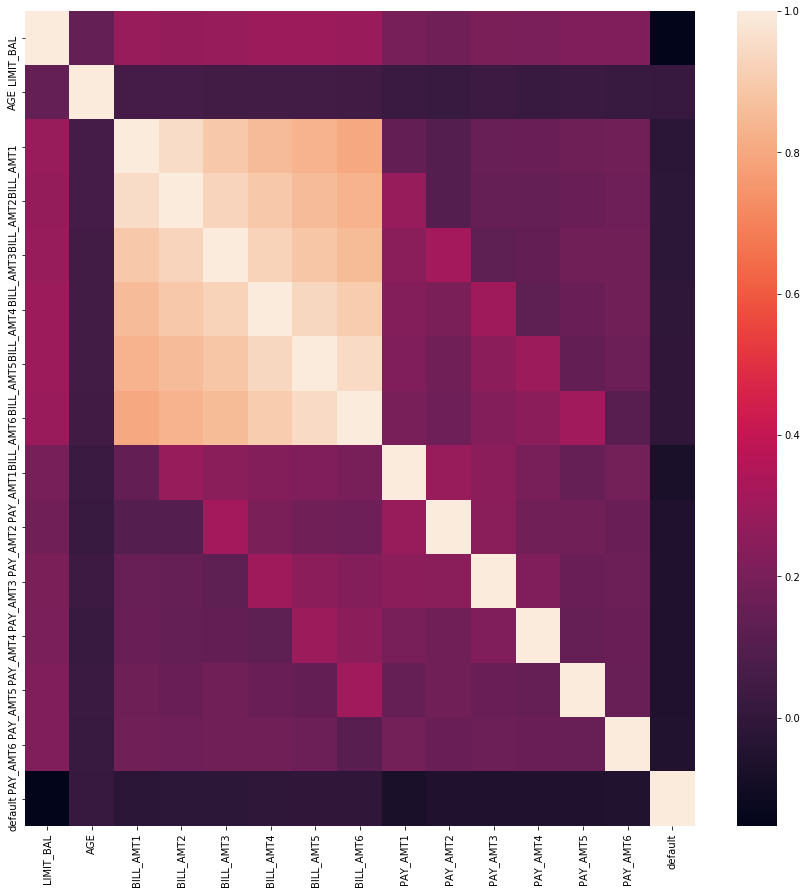

In [18]:
# You can also use "seaborn" package to plot heatmap
# Remember to install seaborn in advance
import seaborn as sns
plt.figure(figsize=(15, 15))
ax = sns.heatmap(correlation)

<div class="alert alert-warning">
<b>Step 2.6: Report summary statistics of variables.</b>
</div>

In [19]:
default_data.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.603733,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.455300,0.532133,0.010767
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.489129,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.498006,0.498975,0.103204
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-warning">
<b>Step 2.7: Split data into features X and output y.</b>
</div>

In [20]:
output = 'default'
X = default_data.drop(output, axis=1) # Here no need to set inplace=True
y = default_data[output]

<div class="alert alert-warning">
<b>Step 2.8: Univariate distribution of output y.</b>
</div>

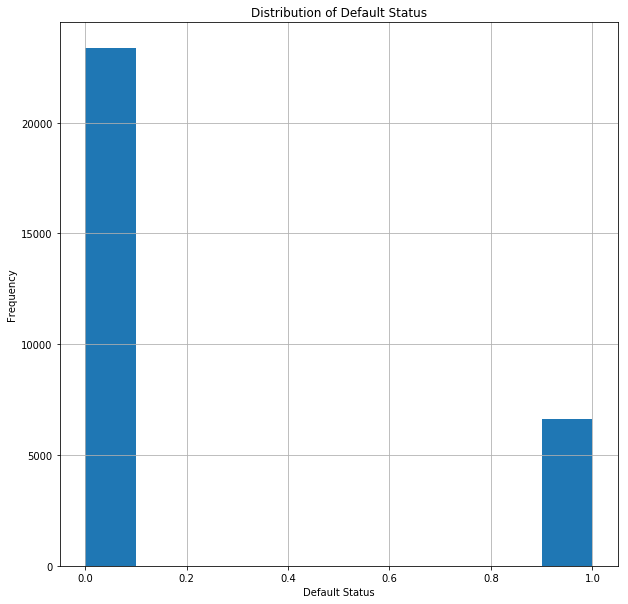

In [21]:
# Distribution of safe and risky loans
plt.figure(figsize=(10,10))
y.hist()
plt.xlabel('Default Status')
plt.ylabel('Frequency')
plt.title('Distribution of Default Status')
plt.show()

<a id="3"></a>

## 3 Linear Regression

### 3.1 Summary of Multiple Linear Regression

From the lecture class, we know that a typical linear regression model of $N$ observations and $p$ predictors:

\begin{align}
Y &= \beta_{0} + \sum_{j=1}^p x_{j} \beta_{j} + \varepsilon \\
&= X\beta + \varepsilon 
\end{align}

And we aim to **Minimize** the loss function (i.e., Ordinary Least Squares, OLS):

$$ RSS(\beta) = \varepsilon^T\varepsilon = (Y-X\beta)^{T}(Y-X\beta)= \sum_{i=1}^{N}(y_{i} - 1\times\beta_{0} - \sum_{j=1}^{p} x_j \beta_{j})^2 $$

Solving this optimization problem, we obtain the normal equations for OLS estimations:
$$ \beta_{OLS} = (X^{T}X)^{-1}X^{T}Y $$

Details of Linear Regression and OLS can be found here: https://en.wikipedia.org/wiki/Ordinary_least_squares

In [22]:
def OLS_Expression(feature_matrix, true_output):
    '''This function is used to calculate OLS coefficients using standard expression.
    Inputs:
    1) feature_matrix: A matrix of selected features
    2) true_output: A vector of true outputs
        
    Outputs:
    1) weights: OLS coefficients
    
    '''
    
    XTX = np.dot(feature_matrix.T, feature_matrix)
    XTY = np.dot(feature_matrix.T, true_output)
    
    weights = np.dot(np.linalg.inv(XTX), XTY)
    
    return weights

<div class="alert alert-warning">
<b>Step 3.1: OLS estimation using our defined function <code>OLS_Expression()</code>. Report coefficients.</b>
</div>

In [23]:
# Add a column vector of 1s into feature matrix as "Intercept" term
from copy import deepcopy

# Remember to use deepcopy, rather than "=". 
# Otherwise, changes made in "feature_variables" will also influence X
# You can try and see the difference here
feature_variables = deepcopy(X) 
feature_variables['Intercept'] = 1
output_variable = deepcopy(y)

In [24]:
coefficients = OLS_Expression(feature_variables, output_variable)

In [25]:
for i, name in enumerate(feature_variables.columns):
    print(i, name, ': ', coefficients[i])

0 LIMIT_BAL :  -4.6972400907411e-07
1 AGE :  0.0006449665006957143
2 BILL_AMT1 :  -5.710839120592258e-07
3 BILL_AMT2 :  4.083596832407519e-07
4 BILL_AMT3 :  4.8865415661726786e-08
5 BILL_AMT4 :  -1.8355877866030665e-08
6 BILL_AMT5 :  2.5712528659049724e-07
7 BILL_AMT6 :  3.3707842475650016e-07
8 PAY_AMT1 :  -1.276271952098929e-06
9 PAY_AMT2 :  -3.5393865231236895e-07
10 PAY_AMT3 :  -3.186004008453308e-07
11 PAY_AMT4 :  -6.711807782028567e-07
12 PAY_AMT5 :  -5.648341508903473e-07
13 PAY_AMT6 :  -1.3003544174247472e-07
14 SEX_2 :  -0.030256486816788386
15 EDUCATION_1 :  0.18342950816867187
16 EDUCATION_2 :  0.18789090750885862
17 EDUCATION_3 :  0.18708564426347607
18 EDUCATION_4 :  0.05684783169536445
19 EDUCATION_5 :  0.028490240688739732
20 EDUCATION_6 :  0.11329526968197001
21 MARRIAGE_1 :  0.1581614305087342
22 MARRIAGE_2 :  0.12525099556592068
23 MARRIAGE_3 :  0.15006040323312675
24 Intercept :  -0.027154665886996554


### 3.2 Using Package: Scikit-Learn

<div class="alert alert-warning">
<b>Step 3.2: OLS estimation using open-source package <code><b>Scikit-Learn</b></code>. Report coefficients.</b>
<br><br>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">linear_model</a>
</div>
</div>

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
reg.fit(X=X, y=y)
print('Feature Coefficients: \n', reg.coef_, '\n Intercept: ', reg.intercept_)

Feature Coefficients: 
 [-4.69724009e-07  6.44966501e-04 -5.71083912e-07  4.08359683e-07
  4.88654157e-08 -1.83558779e-08  2.57125287e-07  3.37078425e-07
 -1.27627195e-06 -3.53938652e-07 -3.18600401e-07 -6.71180778e-07
 -5.64834151e-07 -1.30035442e-07 -3.02564868e-02  1.83429508e-01
  1.87890908e-01  1.87085644e-01  5.68478317e-02  2.84902407e-02
  1.13295270e-01  1.58161431e-01  1.25250996e-01  1.50060403e-01] 
 Intercept:  -0.027154665893216523


<div class="alert alert-danger">
<p>You can compare the results obtained from defined function <code>OLS_Expression()</code> and from <code>sklearn</code>. </p>
</div>

<a id="4"></a>

## 4 Logistic Regression

### 4.1 Summary of Logistic Regression

From the lecture class, we know that a typical logistic regression model of $N$ observations and $p$ predictors:

\begin{align}
\text{Logit}(P(y_{i}=1)) &= log(\frac{P(y_{i}=1)}{1-P(y_{i}=1)}) \\
& = \beta_0 + \sum_{j=1}^p x_j \beta_j \\
& = X\beta
\end{align}

Rewrite the model and we can get this function:

$$ P(y_{i}=1) = \frac{e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}{1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}} $$


We aim to **Maximize** the (log-)likelihood function (or **Minimize** the negative (log-)likelihood function):

$$ l(\beta) = \prod_{i=1}^{N}[\frac{e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}{1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}]^{y_i}[\frac{1}{1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}]^{(1-y_i)} $$
Or
$$ ll(\beta) = \sum_{i=1}^{N}[-log(1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j})+y_{i}(\beta_{0}+\sum_{j=1}^{p}x_j\beta_j)] $$

Let us **Maximize** the log-likelihood function $ll(\beta)$ and get derivative with respect to $\beta_j$:

\begin{align*}
\frac{\partial ll(\beta)}{\partial\beta_j} & = -\sum_{i=1}^{N}\frac{e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}{1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}x_{ij}+\sum_{i=1}^{N}y_{i}x_{ij} \\
& = \sum_{i=1}^{N}(y_{i}-\frac{e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}{1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}})x_{ij} \\
& = \sum_{i=1}^{N}(y_{i}-P(y_{i}=1))x_{ij} \\
\end{align*}

Remember that the predicted score $P(y_{i}=1)$ is calculated as $\frac{e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}{1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j}}=\frac{1}{1+e^{-(\beta_{0}+\sum_{j=1}^{p}x_{j}\beta_{j})}}$ <br/>

Then we can write a predicted score function first.

In [27]:
def score(feature_matrix, weight_vector):
    '''This function is used to calculate predicted probability or score.
    
    Inputs:
    1) feature_matrix: A matrix of selected features;
    2) weight_vector: A vector of coefficients for selected features;
    
    Outputs:
    1) score: A vector of predicted probabilities or scores   
    
    '''
    
    score = 1/(1+np.exp(-np.dot(feature_matrix, weight_vector)))

    return score

In [28]:
# Let us have a test
features = np.array([[2.0, 1.5], [4.8, 5.2]])
weights = np.array([1.0, 1.0])
weights = np.ones((2, 1))
score(features, weights)

array([[0.97068777],
       [0.9999546 ]])

### 4.2 Gradient Ascent For Maximization
#### Note: Gradient ascent for maximizing an objective function is equivalent to Gradient Descent for minimizing the negative objective function.

How can we compute the derivatives of the log-likelihood function? <br/>

We already know that the derivative with respect to $\beta_j$ is: <br/>
\begin{align*}
\frac{\partial ll(\beta)}{\partial\beta_j} & = \sum_{i=1}^{N}(y_{i}-P(y_{i}=1))x_{ij} \\
\end{align*}

In [29]:
def derivative(feature_matrix, error_vector):
    '''This function is used to calculate the derivatives for features.
    Inputs:
    1) feature_matrix: Data matrix of features (j = 0,...,p)
    2) error_vector: A vector of errors of N observations    
    
    Outputs:
    1) derive: Derivative for this feature j    
    
    '''
    
    derive = np.dot(feature_matrix.T, error_vector)
    
    return derive

In [30]:
# Let us have a test
features = np.array([[2.0], [4.8]])
weights = np.ones((1, 1))
true_outputs = np.array([[1], [0]])
predict_score = score(features, weights)
errors = true_outputs - predict_score

print ("True output is: ")
print (true_outputs)
print ("Predicted score is: ")
print (predict_score)
print ("Error is: ")
print (errors)
print ("Derivative is: ")
print (derivative(features, errors))

True output is: 
[[1]
 [0]]
Predicted score is: 
[[0.88079708]
 [0.99183743]]
Error is: 
[[ 0.11920292]
 [-0.99183743]]
Derivative is: 
[[-4.52241381]]


In the lecture class, we know the log-likelihood function is computed as:

\begin{align*}
ll(\beta) & = \sum_{i=1}^{N}[-log(1+e^{\beta_0 + \sum_{j=1}^{p}x_j\beta_j})+y_{i}(\beta_{0}+\sum_{j=1}^{p}x_j\beta_j)] \\
\end{align*}

In [31]:
def log_likelihood(feature_matrix, weight_vector, output_vector):
    '''This function is used to calculate log-likelihood value of given features, output and coefficients
    Inputs:
    1) feature_matrix: A matrix of selected features
    2) weight_vector: A vector of coefficients
    3) output_vector: A vector of true outputs
    
    Outputs:
    1) ll: Log-likelihood value
    
    '''
    
    # Linear term: Xbeta
    X_beta = np.dot(feature_matrix, weight_vector)
    
    # Sum term: The term in the sum_up bracket
    sum_term = -np.log(1+np.exp(X_beta)) + output_vector*X_beta
    
    # Get log-likelihood
    ll = np.sum(sum_term)    
    
    return ll       

#### Procedure for Gradient Ascent:

Step 0: Initialize $ \beta = (\beta_{0},\dots,\beta_{p}) $; <br/>
Step 1: Calculate $ \beta_{j} \leftarrow \beta_{j} + \text{Stepsize}\times(\sum_{i=1}^{N}(y_{i}-P(y_{i}=1))x_{ij}) $, for $j = 1,...,p$; <br/>
Step 2: If not converged, go back to Step 1; <br/>
Step 3: Get $ \beta $.

In [32]:
def Logistic_GA(initial_weights, feature_matrix, true_output, step_size, tolerance, n_iter):
    '''This function is used to iteratively calculate coefficients for logistic regression model using Gradient Aescent.
    Inputs:
    1) initial_weights: Initial regression coefficients
    2) feature_matrix: A matrix of selected features
    3) true_output: A vector of true outputs -> [0, 1]
    4) step_size: Size of step for each iteration of gradient search
    5) tolerance: Indicate converging condition
    6) n_iter: Maximum number of iterations
    
    Outputs:
    1) weights: Estimated coefficients.    
    
    '''
    
    weights = np.array(initial_weights, dtype=np.float64)
    
    for i in range(n_iter):
        # Calculate predicted scores, or probabilitis of y=1
        prediction = score(feature_matrix, weights)
        
        # Calculate errors
        error = true_output - prediction
        
        # Calculating derivatives for weights
        derivative_vector = derivative(feature_matrix, error) 
        
        # Updating weights
        weights += step_size * derivative_vector        
        
        # Converging conditions: L2 norm for derivatives
        sum_squared_gradient = np.sum(np.power(derivative_vector,2))
        # print ('Sqrt of sum of squared gradient: ', np.sqrt(sum_squared_gradient))
        
        # Verify whether converging early and Report Log-likelihood values            
        if np.sqrt(sum_squared_gradient) < tolerance: 
            # Calculate log-likelihood
            loglike = log_likelihood(feature_matrix, weights, true_output)
            
            # Print out log-likelihood
            print ('Iteration %10d: Log-likelihood = %.4f' % (i, loglike))
            print ('The algorithm is already converged.')
            
            return weights
        
        elif (i<=20) or (i<=100 and i%10==0) or (i<=1000 and i%100==0) or (i>1000 and i%1000==0) or (i==n_iter):            
            # Calculate log-likelihood
            loglike = log_likelihood(feature_matrix, weights, true_output)
            
            # Print out log-likelihood
            print ('Iteration %10d: Log-likelihood = %.4f' % (i, loglike))
            
    print ('The algorithm is not converged but reaches maximum iterations.')
    return weights

<div class="alert alert-warning">
<b>Step 4.1: Estimation logistic regression model using our defined functions. Report coefficients.</b>
</div>

In [33]:
# Add a column vector of 1s into feature matrix as "Intercept" term
from copy import deepcopy

# Remember to use deepcopy, rather than "=". 
# Otherwise, changes made in "feature_variables" will also influence X
# You can try and see the difference here
feature_variables = deepcopy(X) 
# feature_variables['Intercept'] = 1
output_variable = deepcopy(y)

In [34]:
feature_variables.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.603733,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.455300,0.532133,0.010767
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.489129,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.498006,0.498975,0.103204
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# We need to rescale the original features, otherwise the optimization process is extremely slow
feature_variables_std = (feature_variables - feature_variables.mean()) / feature_variables.std()
feature_variables_std['Intercept'] = 1 # Add one intercept term
feature_variables_std.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,Intercept
0,-1.136701,-1.245999,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,...,-0.738362,1.066882,-0.442744,-0.064162,-0.097062,-0.041265,1.093761,-1.066454,-0.104324,1
1,-0.365974,-1.029030,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,...,-0.738362,1.066882,-0.442744,-0.064162,-0.097062,-0.041265,-0.914246,0.937656,-0.104324,1
2,-0.597192,-0.161154,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,...,-0.738362,1.066882,-0.442744,-0.064162,-0.097062,-0.041265,-0.914246,0.937656,-0.104324,1
3,-0.905483,0.164300,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,...,-0.738362,1.066882,-0.442744,-0.064162,-0.097062,-0.041265,1.093761,-1.066454,-0.104324,1
4,-0.905483,2.333990,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,...,-0.738362,1.066882,-0.442744,-0.064162,-0.097062,-0.041265,1.093761,-1.066454,-0.104324,1


In [36]:
# Set up initial parameters
initial_weights = np.zeros((len(feature_variables_std.columns), 1))
step_size = 1e-7 
tolerance = 50
iteration = 10**5

# Try logistic estimation with defined functions
coefficients = Logistic_GA(initial_weights, feature_variables_std.values, output_variable.values.reshape((len(output_variable), 1)), step_size, tolerance, iteration)

Iteration          0: Log-likelihood = -20786.5503
Iteration          1: Log-likelihood = -20778.6988
Iteration          2: Log-likelihood = -20770.8607
Iteration          3: Log-likelihood = -20763.0362
Iteration          4: Log-likelihood = -20755.2251
Iteration          5: Log-likelihood = -20747.4274
Iteration          6: Log-likelihood = -20739.6431
Iteration          7: Log-likelihood = -20731.8722
Iteration          8: Log-likelihood = -20724.1146
Iteration          9: Log-likelihood = -20716.3703
Iteration         10: Log-likelihood = -20708.6392
Iteration         11: Log-likelihood = -20700.9214
Iteration         12: Log-likelihood = -20693.2168
Iteration         13: Log-likelihood = -20685.5254
Iteration         14: Log-likelihood = -20677.8471
Iteration         15: Log-likelihood = -20670.1819
Iteration         16: Log-likelihood = -20662.5299
Iteration         17: Log-likelihood = -20654.8908
Iteration         18: Log-likelihood = -20647.2648
Iteration         19: Log-likel

In [37]:
for i, name in enumerate(feature_variables_std.columns):
    print(i, name, ': ', coefficients[i][0])

0 LIMIT_BAL :  -0.3803394735855775
1 AGE :  0.0306861808773249
2 BILL_AMT1 :  -0.21820508138129682
3 BILL_AMT2 :  0.026327929382264973
4 BILL_AMT3 :  0.04805796636381481
5 BILL_AMT4 :  0.09037925344173121
6 BILL_AMT5 :  0.15295143443477205
7 BILL_AMT6 :  0.14760828189037692
8 PAY_AMT1 :  -0.3429698615796277
9 PAY_AMT2 :  -0.3471223724005448
10 PAY_AMT3 :  -0.14754508688604398
11 PAY_AMT4 :  -0.13718626838428577
12 PAY_AMT5 :  -0.09124826421297483
13 PAY_AMT6 :  -0.03590622729345087
14 SEX_2 :  -0.08690451547664947
15 EDUCATION_1 :  0.0225127599947944
16 EDUCATION_2 :  0.025325014702262134
17 EDUCATION_3 :  0.011938638977631229
18 EDUCATION_4 :  -0.08046171827070425
19 EDUCATION_5 :  -0.1314576375964299
20 EDUCATION_6 :  -0.018055061395658396
21 MARRIAGE_1 :  0.07757932261109435
22 MARRIAGE_2 :  -0.02333023198013318
23 MARRIAGE_3 :  0.00667580814557117
24 Intercept :  -1.38693816081858


<div class="alert alert-danger">
<b>Note:</b>
<ol>
    <li>You can try different <code>initial_weights</code>, <code>step_size</code>, <code>tolerance</code>, or <code>iteration</code>.</li>
    <li>You can also use different features to run logistic regression model.</li>
    <li>Large step size may make gradient search fluctuate too much so that the algorithm may not converge.</li>
    <li>Small tolerance may increase the number of iterations, but will result in much more accurate estimators.</li>
</ol>
</div>

In [38]:
# Set up initial parameters
initial_weights = np.ones((len(feature_variables_std.columns), 1))
step_size = 1e-5 
tolerance = 1
iteration = 10**6

# Try logistic estimation with defined functions
coefficients = Logistic_GA(initial_weights, feature_variables_std.values, output_variable.values.reshape((len(output_variable), 1)), step_size, tolerance, iteration)

Iteration          0: Log-likelihood = -95136.0245
Iteration          1: Log-likelihood = -89237.1966
Iteration          2: Log-likelihood = -83450.5891
Iteration          3: Log-likelihood = -77792.5002
Iteration          4: Log-likelihood = -72281.4468
Iteration          5: Log-likelihood = -66938.4567
Iteration          6: Log-likelihood = -61787.4852
Iteration          7: Log-likelihood = -56856.0486
Iteration          8: Log-likelihood = -52176.1883
Iteration          9: Log-likelihood = -47785.8103
Iteration         10: Log-likelihood = -43730.0689
Iteration         11: Log-likelihood = -40061.4297
Iteration         12: Log-likelihood = -36835.2821
Iteration         13: Log-likelihood = -34096.7803
Iteration         14: Log-likelihood = -31856.1062
Iteration         15: Log-likelihood = -30059.4366
Iteration         16: Log-likelihood = -28593.6961
Iteration         17: Log-likelihood = -27344.8835
Iteration         18: Log-likelihood = -26239.6778
Iteration         19: Log-likel

In [39]:
for i, name in enumerate(feature_variables_std.columns):
    print(i, name, ': ', coefficients[i][0])

0 LIMIT_BAL :  -0.3702657198389391
1 AGE :  0.030109751916471927
2 BILL_AMT1 :  -0.569453821717019
3 BILL_AMT2 :  0.350827042641312
4 BILL_AMT3 :  0.12759579962200804
5 BILL_AMT4 :  0.0479647594467974
6 BILL_AMT5 :  0.18818982893458996
7 BILL_AMT6 :  0.10062419574308898
8 PAY_AMT1 :  -0.4295270725761402
9 PAY_AMT2 :  -0.4069385917737866
10 PAY_AMT3 :  -0.1265521871169785
11 PAY_AMT4 :  -0.1294633878775263
12 PAY_AMT5 :  -0.07631327487946188
13 PAY_AMT6 :  -0.031745267367822357
14 SEX_2 :  -0.08692253768399537
15 EDUCATION_1 :  1.2342227758713207
16 EDUCATION_2 :  1.291764823796602
17 EDUCATION_3 :  0.9544799758324217
18 EDUCATION_4 :  0.0816947378756821
19 EDUCATION_5 :  0.11299360486484941
20 EDUCATION_6 :  0.0863099020991494
21 MARRIAGE_1 :  0.6695888392622101
22 MARRIAGE_2 :  0.5703261092083434
23 MARRIAGE_3 :  0.12994513906546482
24 Intercept :  -1.4003705525278998


<div class="alert alert-danger">
<p>You can compare the results obtained from different initial parameters.</p>
</div>

<div class="alert alert-warning">
<b>Step 4.2: Logistic estimation using open-source package <code><b>Scikit-Learn</b></code>. Report coefficients.</b>
<br><br>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">LogisticRegression</a>
</div>
</div>

In [40]:
from sklearn.linear_model import LogisticRegression

# Feature matrix and output variable
feature_variables_std = (feature_variables - feature_variables.mean()) / feature_variables.std()
# output_variable

# We set C=1/lambda to a very large number, because we run normal logistic regression and don't need regularization here
lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=1, C=10**10, solver='newton-cg', random_state=12345)
lr.fit(X=feature_variables_std, y=output_variable)

# Get coefficients
print ('Feature Coefficients: \n', lr.coef_, '\n Intercept: ', lr.intercept_)

Feature Coefficients: 
 [[-0.37022178  0.0301346  -0.569423    0.35070224  0.12776258  0.047954
   0.18811927  0.10060422 -0.42954165 -0.40685182 -0.12650893 -0.12943455
  -0.07630032 -0.03172521 -0.08694728  1.20364401  1.25981603  0.93043956
   0.07763133  0.10685161  0.08367072  0.58292184  0.48342217  0.11193489]] 
 Intercept:  [-1.40014548]


<div class="alert alert-danger">
<p>You can compare the results obtained from defined functions <code>Logistic_GA()</code> and from <code>Scikit-Learn</code>.</p>
</div>

<a id="5"></a>